In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import special as spes

# Hallando ceros de funciones.

Tenemos una función $f(x)$ contínua y bien comportada, al menos en la primera derivada, y necesitamos calcular sus raíces.
$$ f(x_i) = 0 $$

Primero vamos a graficar la función para saber en qué región vamos a buscar los ceros. Supongamos que nuestra función de prueba es una bonita parábola:

$$ f(x) = -x^2 + 5x -2 $$

y supongamos que no sabemos que sus ceros están en:

$$ x_i = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a} $$

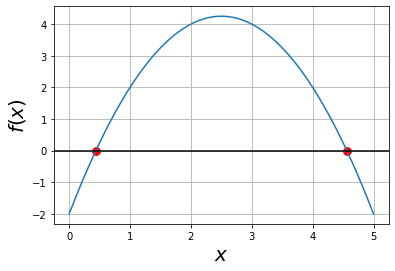

In [2]:
# Función de ejemplo.
def f(x):
    return -x**2 + 5*x -2
# Las raíces analíticas que queremos encontrar
x_1 = (5 + (17)**0.5) / 2.
x_2 = (5 - (17)**0.5) / 2.


x = np.linspace(0, 5, 100)
y = f(x)

plt.plot(x,y)

plt.grid(); plt.axhline(y=0, c='k')
plt.xlabel(r'$x$', size=20); plt.ylabel(r'$f(x)$', size=20)

# Grafica las raíces.
plt.scatter(x_1, 0, s=60, c='r'); plt.scatter(x_2, 0, s=60, c='r')

La primera raíz está en el intervalo $x_1 \in [0,1]$ y la segunda raíz $x_2 \in [4,5]$

## Método 1: Fuerza Bruta

Vamos a buscar la primera raíz $x_1$ entre `x0 = 0` y `xf=1`. Podemos avanzar en pasos $\delta x = 0.02$ desde `x0` y ver en qué momento cambia el signo de la función:

In [3]:
x      = 0
xf     = 1.
deltax = 0.05

while(x <= xf):
    if( f(x) * f(x+deltax) > 0):
        print("No hay cero en :C [{:0.2f}, {:0.2f} ]".format(x, x+deltax) )
    else:
        print("Hay un cero en este intervalo! ^__^  [{:0.2f}, {:0.2f} ]".format(x, x+deltax))
    x += deltax

No hay cero en :C [0.00, 0.05 ]
No hay cero en :C [0.05, 0.10 ]
No hay cero en :C [0.10, 0.15 ]
No hay cero en :C [0.15, 0.20 ]
No hay cero en :C [0.20, 0.25 ]
No hay cero en :C [0.25, 0.30 ]
No hay cero en :C [0.30, 0.35 ]
No hay cero en :C [0.35, 0.40 ]
Hay un cero en este intervalo! ^__^  [0.40, 0.45 ]
No hay cero en :C [0.45, 0.50 ]
No hay cero en :C [0.50, 0.55 ]
No hay cero en :C [0.55, 0.60 ]
No hay cero en :C [0.60, 0.65 ]
No hay cero en :C [0.65, 0.70 ]
No hay cero en :C [0.70, 0.75 ]
No hay cero en :C [0.75, 0.80 ]
No hay cero en :C [0.80, 0.85 ]
No hay cero en :C [0.85, 0.90 ]
No hay cero en :C [0.90, 0.95 ]
No hay cero en :C [0.95, 1.00 ]


Si queremos buscar un cero con precisión  $\Delta x = 1/N$, nos va a tomar del orden de N encontrar la raíz. Ejemplo con N=1000 pasos

In [4]:
x      = 0.
xf     = 1.
N = 10**3
deltax = 1.0 / N
print("deltax = ", deltax)

counter = 0
while(x <= xf):
    if( f(x) * f(x+deltax) > 0):
        x       += deltax
        counter += 1
    else:
        print("Hay un cero en este intervalo! ^__^  [{:0.8f}, {:0.8f} ]".format(x, x+deltax))
        print("Número de pasos: {:01d}".format(counter))
        break;

deltax =  0.001
Hay un cero en este intervalo! ^__^  [0.43800000, 0.43900000 ]
Número de pasos: 438


Ejemplot con N=1'000.000 

In [5]:
x      = 0.
xf     = 1.
N = 10**6
deltax = 1.0 / N
print("deltax = ", deltax)

counter = 0
while(x <= xf):
    if( f(x) * f(x+deltax) > 0):
        x       += deltax
        counter += 1
    else:
        print("Hay un cero en este intervalo! ^__^  [{:0.8f}, {:0.8f} ]".format(x, x+deltax))
        print("Número de pasos: {:04d}".format(counter))
        break;

deltax =  1e-06
Hay un cero en este intervalo! ^__^  [0.43844700, 0.43844800 ]
Número de pasos: 438447


Si evaluamos f(x) en los extremos del intervalo tenemos:

In [6]:
print("x= {:.7f}, f(x) = {:.3e}".format(x, f(x)))
print("x= {:.7f}, f(x) = {:.3e}".format(x+deltax, f(x+deltax)))

x= 0.4384470, f(x) = -7.718e-07
x= 0.4384480, f(x) = 3.351e-06


## Método 2: Ceros por Bisección

Vamos a buscar ceros de un modo más eficiente. Vamos a dividir el intervalo por la mitad y revisar en cuál de los dos intervalos está el cero. Repetimos esta división y búsqueda hasta llegar a la precisión deseada.

Supongamos que queremos encontrar los ceros con una precisión $\epsilon$ tal que:
$$ \left| f(x) \right| < \epsilon$$

Empezamos de nuevo en el intervalo $[a,c]$

Text(1, -0.2, 'c')

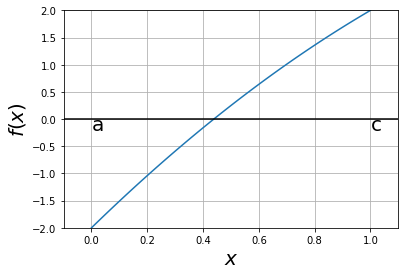

In [7]:
a = 0
c = 1

x = np.linspace(a, c, 100)
y = f(x)

plt.xlim(-0.1, 1.1); plt.ylim(f(a),f(c));
#plt.xlim(a-0.1*(c-a),c+0.1*(c-a)); plt.ylim(f(a),f(c))
plt.plot(x,y); plt.grid(); plt.axhline(y=0, c="k"); plt.xlabel(r'$x$', size=20); plt.ylabel(r'$f(x)$', size=20);

plt.text(a,-0.2, "a", fontsize=20)
plt.text(c,-0.2, "c", fontsize=20)

Primero calculamos $b$ para definir los dos sub intervalos.

Text(1, -0.2, 'c')

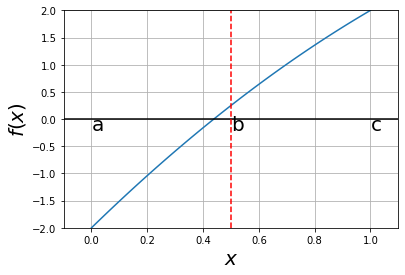

In [8]:
b = (a+c)/2.0

x = np.linspace(a, c, 100)
y = f(x)

plt.xlim(-0.1, 1.1); plt.ylim(f(a),f(c));
#plt.xlim(a-0.1*(c-a),c+0.1*(c-a)); plt.ylim(f(a),f(c))
plt.plot(x,y); plt.grid(); plt.axhline(y=0, c="k"); plt.xlabel(r'$x$', size=20); plt.ylabel(r'$f(x)$', size=20);
#plt.fill([a,b,b,a], [2,2,-2,-2], alpha=0.2)
#plt.fill([b,c,c,b], [2,2,-2,-2], alpha=0.2)

plt.axvline(x=b, ls="--", c='r' )
plt.text(a,-0.2, "a", fontsize=20)
plt.text(b,-0.2, "b", fontsize=20)
plt.text(c,-0.2, "c", fontsize=20)

Y vamos a buscar el cero en los dos intervalos.

In [9]:
def mi_bonito_plot(a,c,f):

    x = np.linspace(0, 1, 100)
    y = f(x)

    plt.xlim(-0.1, 1.1); plt.ylim(-2,2);
    #plt.xlim(a-0.1*(c-a),c+0.1*(c-a)); plt.ylim(f(a),f(c))
    plt.plot(x,y); plt.grid(); plt.axhline(y=0, c="k"); plt.xlabel(r'$x$', size=20); plt.ylabel(r'$f(x)$', size=20);
    plt.fill([a,b,b,a], [2,2,-2,-2], alpha=0.2)
    plt.fill([b,c,c,b], [2,2,-2,-2], alpha=0.2)

    plt.axvline(x=b, ls="--", c='r' )
    plt.text(a,-0.2, "a", fontsize=20)
    plt.text(b,-0.2, "b", fontsize=20)
    plt.text(c,-0.2, "c", fontsize=20)
    
    plt.scatter([a, b, c], [f(a),f(b),f(c)], s=60, c='r')
    
    print("tamaño del intervalo = ", c-a)

Y de nuevo, como en el método por inspección, vamos a evaluar si la función cambia de signo entre $[a,b]$ o si cambia de signo entre $[b,c]$

tamaño del intervalo =  1


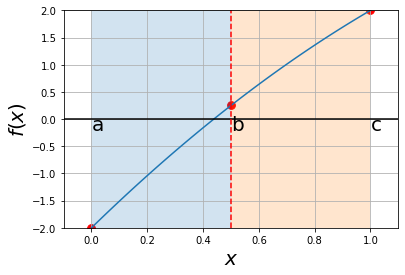

In [10]:
mi_bonito_plot(a,c,f)

In [11]:
def cambia_de_signo(x_l, x_r, f):
    if( f(x_l)*f(x_r) > 0):
        return False
    else:
        return True

Como esperabamos, la función cambia de signo entre [0,1]. 

In [12]:
cambia_de_signo(a, c, f)

True

Y ahora en el primer intervalo [a,b]

In [13]:
cambia_de_signo(a, b, f)

True

In [14]:
cambia_de_signo(b, c, f)

False

Nos vamos a quedar con el primer intervalo. Dejamos `a=a` y movemos `c` hacia la izquierda, `c=b`

In [15]:
c = b

Y repetimos el procedimiento:

tamaño del intervalo =  0.5


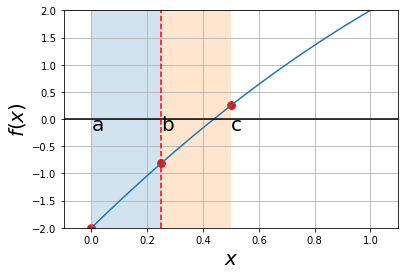

In [16]:
b = (a+b)/2.0

mi_bonito_plot(a, c, f)

In [17]:
cambia_de_signo(a, b, f)

False

In [18]:
cambia_de_signo(b, c, f)

True

Achicamos el intervalo moviendo `b` hacia la derecha.

tamaño del intervalo =  0.25


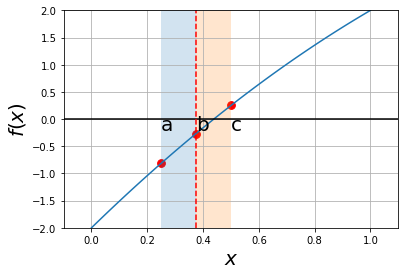

In [19]:
a = b

b = (a+c)/2.0

mi_bonito_plot(a, c, f)

In [20]:
cambia_de_signo(a, b, f)

False

In [21]:
cambia_de_signo(b, c, f)

True

tamaño del intervalo =  0.125


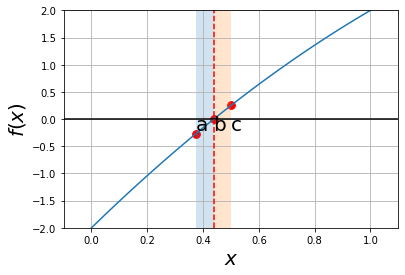

In [22]:
a = b

b = (a+c)/2.0

mi_bonito_plot(a, c, f)

Haciendo esto tantas veces como sea necesario hasta que tengamos la condición de 
$$ \left| f(x) \right| < \epsilon$$

In [23]:
def encuentra_cero_por_biseccion_en(a, c, f, epsilon):
    counter = 0
    b = (a+c)/2.0

    while( c-a > epsilon):
        if cambia_de_signo(a ,b, f):
            c = b
        else:
            a = b
        counter +=1
        b = (a+c)/2.0
    
    print("Pasos ejecutados: ", counter)
    print("Tamaño del intervalo: ", c-a)
    return b

In [24]:
encuentra_cero_por_biseccion_en(0, 1, f, 10**(-1))

Pasos ejecutados:  4
Tamaño del intervalo:  0.0625


0.46875

In [25]:
encuentra_cero_por_biseccion_en(0, 1, f, 10**(-3))

Pasos ejecutados:  10
Tamaño del intervalo:  0.0009765625


0.43798828125

In [26]:
encuentra_cero_por_biseccion_en(0, 1, f, 10**(-5))

Pasos ejecutados:  17
Tamaño del intervalo:  7.62939453125e-06


0.4384498596191406

In [27]:
encuentra_cero_por_biseccion_en(0, 1, f, 10**(-10))

Pasos ejecutados:  34
Tamaño del intervalo:  5.820766091346741e-11


0.4384471872181166

Text(0, 0.5, 'Número de pasos')

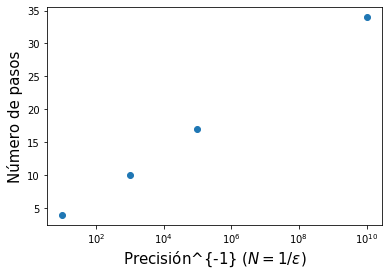

In [28]:
N = [1e1, 1e3, 1e5, 1e10]
pasos = [4, 10, 17, 34]

plt.scatter(N,pasos)
plt.xscale("log"); #plt.xlim(1e-11,1)
plt.xlabel(r"Precisión^{-1} ($N = 1/\epsilon$)", fontsize=15)
plt.ylabel("Número de pasos", fontsize=15)

### Teorema del método de bisección:

Podemos calcular el mínimo de pasos necesarios para llegar a la raíz con una tolerancia $\pm \epsilon$ dentro del intervalo inicial [a,c]

$$ N \geq \frac{\log\left(\frac{c-a}{\epsilon}\right)}{\log{2}} $$

https://x-engineer.org/undergraduate-engineering/advanced-mathematics/numerical-methods/the-bisection-method-for-root-finding/

In [29]:
def N_min (a,c, epsilon):
    return np.log( (c-a)/epsilon) / np.log(2)

In [30]:
N_min(0,1, 1e-1)

3.3219280948873626

In [31]:
N_min(0,1, 1e-3)

9.965784284662087

In [32]:
N_min(0,1, 1e-5)

16.609640474436812

In [33]:
N_min(0,1, 1e-10)

33.219280948873624

Text(0, 0.5, 'Número de pasos')

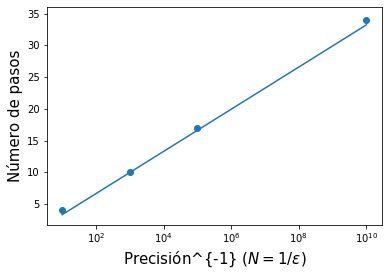

In [34]:
N = np.array([1e1, 1e3, 1e5, 1e10])
pasos = [4, 10, 17, 34]

plt.plot(N, N_min(0,1, 1/N))
plt.scatter(N,pasos)
plt.xscale("log"); #plt.xlim(1e-11,1)
plt.xlabel(r"Precisión^{-1} ($N = 1/\epsilon$)", fontsize=15)
plt.ylabel("Número de pasos", fontsize=15)

### Resumen del Cero por Bisección:

1. Graficar la función para saber dónde voy a buscar el cero.

2. Definir a mano ese primer intervalo $[a,c]$, y definir la tolerancia epsilon

3. definir el punto medio 
$$b = \frac{a+c}{2}$$

4. Evaluar si la función cambia de signo en el intervalo $[a,b]$ o en el intervalo $[a,c]$

5. Elegir el intervalo donde cambió como el nuevo intervalo $[a,c]$. (Esto es reemplazar a por b  o reemplazar c por b, según el caso)

6. Repetir  desde 3 mientras que el intervalo sea mayor que una tolerancia que definimos desde un principio

$$(c-a) < \epsilon$$

## Método 3: Newton-Rapshon



De nuevo, tenemos nuestra función $f(x)$, y estamos parados en el punto $x_0$ cerca a la raíz de la función. Entonces:
$$ f(x_0) \simeq 0 $$

Text(0.05, -2, '$f(x_0)$')

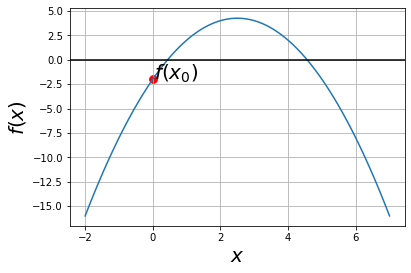

In [35]:
x0 = 0

x = np.linspace(-2, 7, 100)
y = f(x)

#plt.xlim(-0.2, 1.2); plt.ylim(-4,2.1);
plt.plot(x,y); plt.grid(); plt.axhline(y=0, c="k"); plt.xlabel(r'$x$', size=20); plt.ylabel(r'$f(x)$', size=20);

plt.scatter(x0, f(x0), s=60, c='r')
plt.text(x0 + 0.05, f(x0), r"$f(x_0)$", fontsize=20)

Podemos aproximar la función $f(x)$ a una línea recta, conservando los dos primeros términos de la serie de Taylor.
$$ f(x = x_0 + \Delta x) \simeq f(x_0) + \frac{df}{dx} \bigg|_{x_0} $$

siendo $\Delta x$ la corrección desconocida que queremos realizar para movernos hacia la raíz.

Text(0.05, -2, '$f(x_0)$')

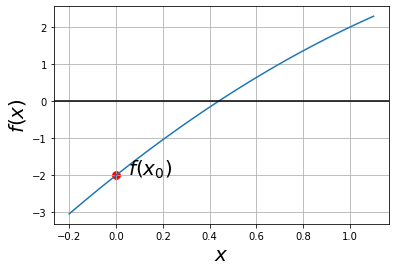

In [36]:
x0 = 0

x = np.linspace(-0.2, 1.1, 100)
y = f(x)

#plt.xlim(-0.2, 1.2); plt.ylim(-4,2.1);
plt.plot(x,y); plt.grid(); plt.axhline(y=0, c="k"); plt.xlabel(r'$x$', size=20); plt.ylabel(r'$f(x)$', size=20);

plt.scatter(x0, f(x0), s=60, c='r')
plt.text(x0 + 0.05, f(x0), r"$f(x_0)$", fontsize=20)

Con esta aproximación lineal, en el punto $x$ la función vale cero. Entonces:

$$  f(x_0) + \frac{df}{dx}\bigg|_{x0} \Delta x = 0 $$

despejando, encontramos que la corrección $\Delta x$ que queremos hacer es:

$$ \Delta x = - \frac{ f(x) }{ df / dx |_{x0} }$$



Podemos usar la definición de derivada con dos puntos:
$$ \frac{df}{dx} \approx \frac{f(x+ \epsilon) - f(x)}{\epsilon} + \mathcal{O(\epsilon^2)}$$
con $\epsilon$ pequeño.

In [37]:
def derivada(x, epsilon, f):
    return (f(x+epsilon) - f(x))/epsilon

In [38]:
derivada(x0, 0.001, f)

4.998999999999976

In [39]:
def recta(x, m, b):
    return m*x + b

Text(0.05, -2, '$f(x_0)$')

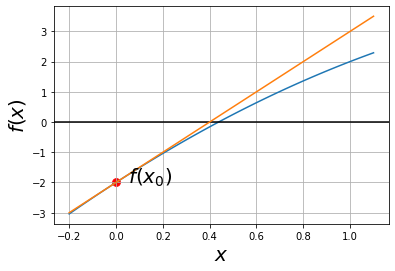

In [40]:
x0 = -0

x  = np.linspace(-0.2, 1.1, 100)
y  = f(x)

m = derivada(x0, 0.001, f)
b = f(x0)-(m*x0)
y2 = recta(x, m, b)    # Esta es la aproximación

#plt.xlim(-0.2, 1.2); plt.ylim(-4,2.1);
plt.plot(x,y); plt.grid(); plt.axhline(y=0, c="k"); plt.xlabel(r'$x$', size=20); plt.ylabel(r'$f(x)$', size=20);
plt.plot(x,y2)

plt.scatter(x0, f(x0), s=60, c='r')
plt.text(x0 + 0.05, f(x0), r"$f(x_0)$", fontsize=20)

La corrección necesaria en este caso será:

In [41]:
Deltax = -f(x0) / derivada(x0, 0.0001, f)

print(x0 + Deltax)

0.40000800015999866


y repetimos.

Text(0.45000800015999864, -0.15996639939200819, '$f(x_0)$')

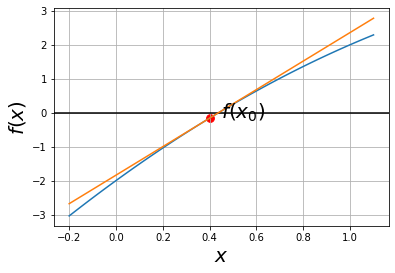

In [42]:
x0 = x0 + Deltax

x  = np.linspace(-0.2, 1.1, 100)
y  = f(x)

m = derivada(x0, 0.00001, f)
b = f(x0)-(m*x0)
y2 = recta(x, m, b)    # Esta es la aproximación

#plt.xlim(-0.2, 1.2); plt.ylim(-4,2.1);
plt.plot(x,y); plt.grid(); plt.axhline(y=0, c="k"); plt.xlabel(r'$x$', size=20); plt.ylabel(r'$f(x)$', size=20);
plt.plot(x,y2)

plt.scatter(x0, f(x0), s=60, c='r')
plt.text(x0 + 0.05, f(x0), r"$f(x_0)$", fontsize=20)

In [43]:
Deltax = -f(x0) / derivada(x0, 0.00001, f)

print("Valor actual de x0: ", x0, " f(x0)", f(x0))
print("Corrección: ", Deltax)
print("Nuevo Valor de x0: ", x0 + Deltax, " f(x0)", f(x0 + Deltax))

x0 = x0 + Deltax

Valor actual de x0:  0.40000800015999866  f(x0) -0.15996639939200819
Corrección:  0.03808747373323028
Nuevo Valor de x0:  0.43809547389322895  f(x0) -0.0014502747795881454


In [44]:
Deltax = -f(x0) / derivada(x0, 0.00001, f)

print("Valor actual de x0: ", x0, " f(x0)", f(x0))
print("Corrección: ", Deltax)
print("Nuevo Valor de x0: ", x0 + Deltax, " f(x0)", f(x0 + Deltax))

x0 = x0 + Deltax

Valor actual de x0:  0.43809547389322895  f(x0) -0.0014502747795881454
Corrección:  0.0003516841536712744
Nuevo Valor de x0:  0.4384471580469002  f(x0) -1.201649024729079e-07


In [45]:
Deltax = -f(x0) / derivada(x0, 0.00001, f)

print("Valor actual de x0: ", x0, " f(x0)", f(x0))
print("Corrección: ", Deltax)
print("Nuevo Valor de x0: ", x0 + Deltax, " f(x0)", f(x0 + Deltax))

x0 = x0 + Deltax

Valor actual de x0:  0.4384471580469002  f(x0) -1.201649024729079e-07
Corrección:  2.9144340002171953e-08
Nuevo Valor de x0:  0.4384471871912402  f(x0) 2.90878432451791e-13


En cuatro pasos hemos superado la precisión que tomó 17 pasos en el método de bisección.

In [46]:
def encuentra_cero_por_Newton_Raphson(x0, x_precision, epsilon, f):
    Deltax = - f(x0) / derivada(x0, epsilon, f) 
    counter = 0
    
    while( abs( Deltax ) > x_precision):
        Deltax = -f(x0) / derivada(x0, epsilon, f)
        x0 += Deltax
        counter += 1
        
    print("x0=", x0, ", f(x0)=", f(x0), ", pasos=", counter)
    return x0

In [47]:
encuentra_cero_por_Newton_Raphson(0, 1e-10, 1e-10, f)

x0= 0.43844718719116976 , f(x0)= 4.440892098500626e-16 , pasos= 5


0.43844718719116976

# Resumen del método de Newton-Raphson

1. Tenemos un punto inicial cercano a la raíz que queremos encontrar. (Importante hacer la gráfica para saber dónde empezar)

2. Calculamos la pendiente.

3. Aproximamos la función a una recta.

4. Calculamos cuál es el punto de corte de la recta.

5. Desplazamos nuestro punto inicial hacia ese corte.

6. Repetimos hasta alcanzar la precisión deseada.

con la pendiente $$ m = \frac{df}{dx} $$

$$ \Delta x = - \frac{f(x_0)}{df/dx}$$

$$ x_{new} = x_0 + \Delta x$$

Usando la derivada que ya veníamos utilizando en la clase magistral

$$ \frac{df}{dx} \approx \frac{f(x+\delta x) - f(x)}{\delta x} $$

Revisar el libro "A Survey of Computational Physics" de Landau, Páez y Bordeianau.  (2008) para una discusión sobre cuando este método falla.